# Titanic Data Science Solutions

### The objective of this notebook is to follow a step-by-step workflow, explaining each step and rationale for every decision we take during solution development.

## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.
1. Question or problem definition.
2. Acquire training and testing data.
3. Acquire training and testing data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

## Importing Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import sys

In [2]:
# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Acquire Data
The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [4]:
# loading training data
train_df = pd.read_csv("datasets/train.csv")

# loading test data
test_df = pd.read_csv("datasets/test.csv")

# combining training and test data
combine = [train_df, test_df]

In [5]:
# preview dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.

In [6]:
# getting features names
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Features Names
Our dataset includes these features.
1. PassengerId - Id of passengers.
2. Survived - Whether passenser survived(1) or not(0).
3. Pclass - Coach Class of passengers(1st, 2nd and 3rd class).
4. Name - Name of passengers.
5. Sex - Defines sex of passengers.
6. Age - Age of passengers.
7. SibSp - Whether passesgers are with there sibbling and spouse(1) or not(0).
8. Parch - Having parent child realtionship.
9. Ticket - Ticket number of passengers.
10. Fare - Ship fares of passengers.
11. Cabin - Cabin number of passengers.
12. Embarked - Point of boarding in ship.

### Which features are categorical?
These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

* Categorical: Survived, Sex, and Embarked.
* Ordinal: Pclass.

### Which features are numerical?
Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

* Continous: Age, Fare.
* Discrete: SibSp, Parch.

### Which features are mixed data types?
Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

* Ticket is a mix of numeric and alphanumeric data types.
* Cabin is alphanumeric.

### Which features may contain errors or typos?
This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

* Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [7]:
# getting info of train dataframe
train_df.info()
print('_'*40)
print(' ')

# getting info of test dataframe
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-nu

### Which features contain blank, null or empty values?
These will require correcting.(Total = 891, Cabin = 204, Age = 714)

* Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
* Cabin > Age are incomplete in case of test dataset. (NaN)

### What are the data types for various features?
Helping us during converting goal.

* Seven features are integer or floats. Six in case of test dataset.
* Five features are strings (object).

In [8]:
# describing statistical measures of numerical data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### What is the distribution of numerical feature values across the samples?
This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.

In [9]:
# describing statistical measures of categorical data
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wheadon, Mr. Edward H",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### What is the distribution of categorical features?
* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

### Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

1. Correlating.
We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.


2. Completing.
We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.


3. Correcting.
Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.


4. Creating.
We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.


5. Classifying.
We may also add to our assumptions based on the problem description noted earlier.

 1. Women (Sex=female) were more likely to have survived.
 2. Children (Age<?) were more likely to have survived.
 3. The upper-class passengers (Pclass=1) were more likely to have survived.


In [10]:
# analyze by pivoting features Pclass and Survived
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False)\
                                .mean()\
                                .sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
# analyze by pivoting features Sex and Survived
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False)\
                                .mean()\
                                .sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
# analyze by pivoting features SibSp and Survived
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False)\
                                .mean()\
                                .sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
# analyze by pivoting features Parch and Survived
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False)\
                                .mean()\
                                .sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

* Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived. We decide to include this feature in our model.


* Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74%.


* SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features.



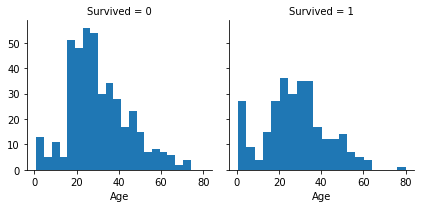

In [14]:
# ploting grid for Age vs Survived
grid = sns.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'Age', bins=20)

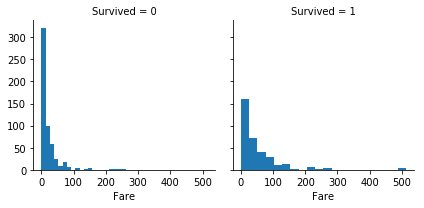

In [15]:
# ploting grid for Fare vs Survived
grid = sns.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'Fare', bins=20)

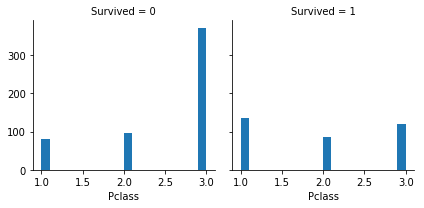

In [16]:
# ploting grid for PClass vs Survived
grid = sns.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'Pclass', bins=20)

### Analyze by visualizing data
A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)
Note that x-axis in historgram visualizations represents the count of samples or passengers.

#### Observations
* Infants (Age <=4) had high survival rate.


* Oldest passengers (Age = 80) survived.


* Large number of 15-25 year olds did not survive.


* Most passengers are in 15-35 age range.


* Higher fare higher the rate of survival.


* Survival rate of passengers from 1st class is more than 3rd class.

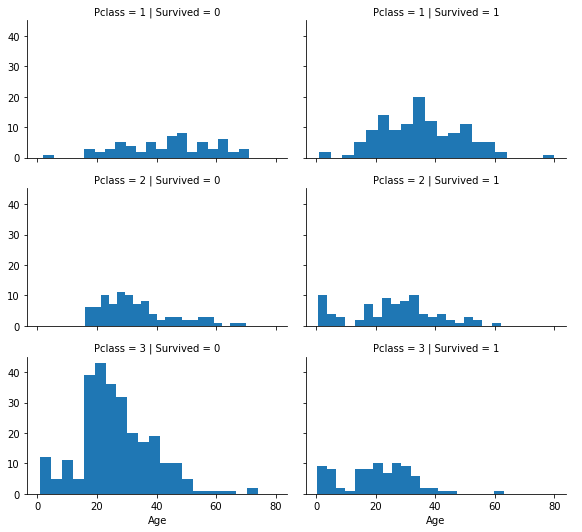

In [17]:
# visualizing correlation of numerical and ordinal features
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.5, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=1, bins=20)
grid.add_legend();

### Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

#### Observations
* Pclass=3 had most passengers, however most did not survive.


* Infant passengers in Pclass=2 and Pclass=3 mostly survived.


* Most passengers in Pclass=1 survived.


* Pclass varies in terms of Age distribution of passengers.

/home/sumitkumar/installation/anaconda-install/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/sumitkumar/installation/anaconda-install/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


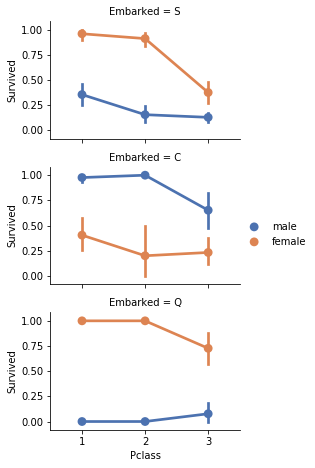

In [18]:
# correlate categorical features
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Correlating categorical features
Now we can correlate categorical features with our solution goal.

#### Observation

* Female passengers had much better survival rate than males.


* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.


* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. 


* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. 

/home/sumitkumar/installation/anaconda-install/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/sumitkumar/installation/anaconda-install/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


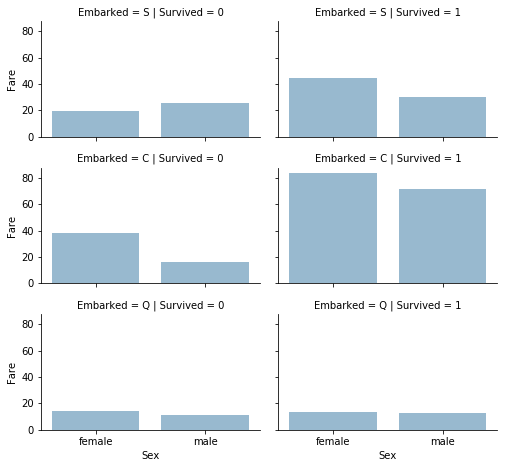

In [19]:
# correlate categorical features
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### Correlating categorical and numerical features
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

#### Observation

* Higher fare paying passengers had better survival. Confirms our assumption for creating fare ranges.


* Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing 

In [20]:
# data wrangling
print("Before : \n")
print("Train Data :", train_df.shape)
print("Test Data :", test_df.shape)
print("Combine[0] Data :", combine[0].shape)
print("Combine[1] Data :", combine[1].shape)

# droping unused columns which are having no predicting power
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After : \n")
print("Train Data :", train_df.shape)
print("Test Data :", test_df.shape)
print("Combine[0] Data :", combine[0].shape)
print("Combine[1] Data :", combine[1].shape)

Before : 

Train Data : (891, 12)
Test Data : (418, 11)
Combine[0] Data : (891, 12)
Combine[1] Data : (418, 11)
After : 

Train Data : (891, 10)
Test Data : (418, 9)
Combine[0] Data : (891, 10)
Combine[1] Data : (418, 9)


### Wrangle data
We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

#### Correcting by dropping features
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin and Ticket features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [21]:
# extract titles and find correlation between titles and survival
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
# replace many titles with a more common name or classify them as rare
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()\
                               .sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [23]:
# convert the categorical titles to ordinal
title_mapping = {"Mrs":1, "Miss":2, "Master":3, "Rare":4, "Mr":5}

# mapping title in dataset
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
# previewing data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5


In [24]:
# drop the Name feature from training and testing datasets
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
print("Train Data :", train_df.shape) 
print("Test Data :", test_df.shape)

Train Data : (891, 9)
Test Data : (418, 9)


### Creating new feature extracting from existing
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.
In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

#### Observation
* Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).


In [25]:
# convert features which contain strings to numerical values.
sex_mapping = {'female':1, 'male':0}

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping).astype(int)
    
# previewing data
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,5
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,5


### Converting a categorical feature
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [26]:
#  create a new feature for FamilySize which combines Parch and SibSp
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False)\
                                    .mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [27]:
# create another feature called IsAlone
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.346575
1,1,0.552795


In [28]:
# dropping columns FamilySize, SibSp and Parch in favor of IsAlone
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
866,1,2,1,27.0,13.8583,C,2,1
381,1,3,1,1.0,15.7417,C,2,0
654,0,3,1,18.0,6.7500,Q,2,0
13,0,3,0,39.0,31.2750,S,5,0
230,1,1,1,35.0,83.4750,S,1,1


### Create new feature combining existing feature
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.
We can create another feature called IsAlone.
Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [29]:
# finding most frequent port
freq_port = train_df.Embarked.dropna().mode()[0]
print('Most Frequrnt Port :', freq_port)

Most Frequrnt Port : S


In [30]:
# populating missing values with the frequent one
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False)\
                                  .mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Completing a categorical feature
Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [31]:
# populating missing age value
for dataset in combine:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df['CategoricalAge'] = pd.cut(train_df['Age'], 5)

print(train_df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.540541
1   (16.0, 32.0]  0.345982
2   (32.0, 48.0]  0.380952
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


/home/sumitkumar/installation/anaconda-install/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
# populating missing fare values
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 4)
print(train_df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [33]:
# categorozing age
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,CategoricalAge,CategoricalFare
0,0,3,0,1,7.2500,S,5,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,1,2,71.2833,C,1,1,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,1,1,7.9250,S,2,0,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,1,2,53.1000,S,1,1,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,0,2,8.0500,S,5,0,"(32.0, 48.0]","(7.91, 14.454]"


In [34]:
# categorizing fare
for dataset in combine:    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,CategoricalAge,CategoricalFare
0,0,3,0,1,0,S,5,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,1,2,3,C,1,1,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,1,1,1,S,2,0,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,1,2,3,S,1,1,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,0,2,1,S,5,0,"(32.0, 48.0]","(7.91, 14.454]"


In [35]:
# removing CategoricalAge and CategoricalFare
train_df = train_df.drop(['CategoricalAge', 'CategoricalFare'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,S,5,1
1,1,1,1,2,3,C,1,1
2,1,3,1,1,1,S,2,0
3,1,1,1,2,3,S,1,1
4,0,3,0,2,1,S,5,0


### Completing a numerical continuous feature
Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.
we have plenty of missing values in this feature. # generate random numbers between (mean - std) and (mean + std). then we categorize age into 5 range.

Fare also has some missing value and we will replace it with the median. then we categorize it into 4 ranges.

In [36]:
# convert the EmbarkedFill feature by creating a new numeric Port feature
port_mapping = {'S': 0, 'C': 1, 'Q': 2}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(port_mapping).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,5,1
1,1,1,1,2,3,1,1,1
2,1,3,1,1,1,0,2,0
3,1,1,1,2,3,0,1,1
4,0,3,0,2,1,0,5,0


### Model, predict and solve
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

In [37]:
# creating test and train data
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [38]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/home/sumitkumar/installation/anaconda-install/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.35

In [39]:
# finding coefficient
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,0.845686
4,Embarked,0.352025
6,IsAlone,0.040754
3,Fare,0.029360
2,Age,-0.025995
5,Title,-0.545302
0,Pclass,-0.910248


### Observation
We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

* Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.


* Inversely as Pclass increases, probability of Survived=1 decreases the most.



In [40]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/home/sumitkumar/installation/anaconda-install/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.73

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.
Note that the model generates a confidence score which is higher than Logistics Regression model.

In [41]:
# KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.62

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [42]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.45

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem

In [43]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.91

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [44]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/home/sumitkumar/installation/anaconda-install/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


80.02

In [45]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.67

In [46]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

87.54

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.The model confidence score is the highest among models evaluated so far.

In [47]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.54

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia.

The model confidence score is the highest among models evaluated so far.

In [48]:
# creating dataframe for model evaluation
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.54
8,Decision Tree,87.54
1,KNN,84.62
0,Support Vector Machines,83.73
7,Linear SVC,80.02
5,Perceptron,79.91
2,Logistic Regression,79.35
4,Naive Bayes,78.45
6,Stochastic Gradient Decent,77.67


### Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.